### 07-1 인공신경망
#### 핵심키워드: 인공 신경망, 케라스, 밀집층, 원-핫 인코딩

In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import tensorflow as tf

print("Keras:", keras.__version__)
print("TensorFlow:", tf.__version__)
print("Backend:", keras.config.backend())
	

2025-11-18 13:27:33.976402: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-18 13:27:33.983137: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-18 13:27:34.049734: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-18 13:27:34.107771: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763440054.159575   14065 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763440054.17

Keras: 3.8.0
TensorFlow: 2.18.0
Backend: tensorflow


In [3]:
import keras
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [4]:
#훈련세트 데이터 크기확인
print(train_input.shape, train_target.shape)


(60000, 28, 28) (60000,)


In [5]:
#테스트 세트 데이터 크기 확인
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


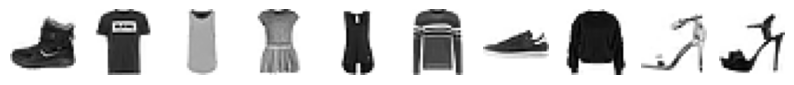

In [6]:
#훈련데이터에서 샘플 그림 출력
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10)) 
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r') 
    axs[i].axis('off')
plt.show()

In [7]:
# 샘플의 타깃값 확인
print(train_target[:10])

[9 0 0 3 0 2 7 2 5 5]


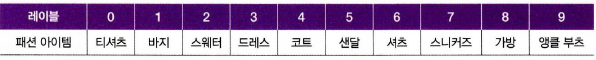

In [8]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


#### 로지스틱 회귀로 패션 아이템 분류하기

In [9]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [10]:
print(train_scaled.shape)

(60000, 784)


In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42) 
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1) 
print(np.mean(scores['test_score']))

/home/user/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/user/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.8194166666666666


/home/user/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/user/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/user/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


#### 인공신경망

In [12]:
import tensorflow as tf

In [13]:
import keras

In [14]:
keras.config.backend()  

'tensorflow'

In [15]:
import os
os.environ["KERAS_BACKED"] = "torch"   # Ehsms "jak"

#### 인공신경망으로 모델만들기

In [16]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, trai_target, val_target = train_test_split(
train_scaled, train_target, test_size=0.2, random_state=42)

In [17]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (60000,)


In [18]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [19]:
inputs = keras.layers.Input(shape=(784,))

In [20]:
dense = keras.layers.Dense(10, activation = 'softmax')

In [21]:
model = keras.Sequential([inputs, dense])

W0000 00:00:1763440067.607503   14065 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


#### 인공신경망으로 패션 아이템 분류하기

In [22]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
print(train_target[:10])

[9 0 0 3 0 2 7 2 5 5]


In [25]:
model.fit(train_scaled, train_target, epochs=5)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 48000
'y' sizes: 60000


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0966 - loss: 2.4787


[2.476083755493164, 0.09700000286102295]